In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import IsolationForest

In [35]:
data_train=pd.read_csv("/Users/steafen/Desktop/order_train1.csv")
data_train

,order_date,sales_region_code,item_code,first_cate_code,second_cate_code,sales_chan_name,item_price,ord_qty
0,2015/9/1,104,22069,307,403,offline,1114.0,19
1,2015/9/1,104,20028,301,405,offline,1012.0,12
2,2015/9/2,104,21183,307,403,online,428.0,109
3,2015/9/2,104,20448,308,404,online,962.0,3
4,2015/9/2,104,21565,307,403,offline,1400.0,3
...,...,...,...,...,...,...,...,...
597689,2018/12/20,102,20994,302,408,offline,843.0,59
597690,2018/12/20,102,21875,302,408,offline,762.0,502
597691,2018/12/20,102,20215,302,408,offline,2013.0,106
597692,2018/12/20,102,20195,302,408,offline,2120.0,187


## 箱线图

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt


In [108]:
group=data_train.groupby("item_code")

In [178]:
describe=group.describe()

In [184]:
describe["sales_region_code"]["count"]

item_code
20001      13.0
20002     694.0
20003    2767.0
20005      20.0
20006    1523.0
          ...  
22080    1724.0
22081    1269.0
22082     159.0
22083     311.0
22084     468.0
Name: count, Length: 1758, dtype: float64

In [191]:
describe1=describe[describe["sales_region_code"]["count"]<=50]

In [193]:
describe1[describe1["sales_region_code"]["count"]>=40]

sales_region_code                                              \
                      count        mean       std    min     25%    50%   
item_code                                                                 
20098                  49.0  102.122449  0.331201  102.0  102.00  102.0   
20105                  49.0  104.673469  1.106567  101.0  105.00  105.0   
20218                  50.0  105.000000  0.000000  105.0  105.00  105.0   
20429                  43.0  101.674419  1.491578  101.0  101.00  101.0   
20520                  45.0  102.466667  1.925900  101.0  101.00  101.0   
20572                  44.0  102.022727  0.263133  101.0  102.00  102.0   
20594                  42.0  102.119048  1.233721  101.0  101.00  102.0   
20603                  45.0  101.666667  0.707107  101.0  101.00  102.0   
20607                  50.0  102.000000  0.534522  101.0  102.00  102.0   
20639                  43.0  103.302326  1.832704  101.0  101.00  105.0   
20680                  46.0  103.978261  1.679803  101.0  102.25  105.0   
20711                  49.0  104.775510  0.685119  102.0  105.00  105.0   
20915                  50.0  104.420000  1.144463  101.0  105.00  105.0   
20919                  43.0  103.906977  1.540160  101.0  103.00  105.0   
20970                  44.0  101.795455  0.667503  101.0  101.00  102.0   
21169                  50.0  104.760000  0.959592  101.0  105.00  105.0   
21237                  46.0  102.565217  1.845742  101.0  101.00  101.5   
21317                  48.0  105.000000  0.000000  105.0  105.00  105.0   
21328                  46.0  102.130435  0.748590  101.0  102.00  102.0   
21340                  48.0  104.937500  0.433013  102.0  105.00  105.0   
21420                  40.0  102.025000  0.576795  101.0  102.00  102.0   
21444                  40.0  104.225000  1.367901  101.0  104.25  105.0   
21497                  48.0  101.083333  0.577350  101.0  101.00  101.0   
21500                  44.0  104.909091  0.421414  103.0  105.00  105.0   
21529                  43.0  103.790698  1.319418  101.0  103.00  105.0   
21543                  42.0  101.976190  0.811145  101.0  101.00  102.0   
21553                  49.0  105.000000  0.000000  105.0  105.00  105.0   
21600                  49.0  102.020408  1.282735  101.0  101.00  102.0   
21616                  41.0  102.073171  0.607875  101.0  102.00  102.0   
21627                  40.0  102.000000  0.000000  102.0  102.00  102.0   
21660                  43.0  102.093023  1.376918  101.0  101.00  102.0   
21666                  47.0  105.000000  0.000000  105.0  105.00  105.0   
21696                  46.0  104.869565  0.499275  103.0  105.00  105.0   
21724                  42.0  101.928571  1.112958  101.0  101.00  102.0   
21733                  44.0  103.636364  1.036338  101.0  103.00  103.0   
21772                  43.0  101.930233  0.768280  101.0  101.50  102.0   
21783                  42.0  101.357143  0.576847  101.0  101.00  101.0   
21793                  50.0  102.280000  1.030950  101.0  101.00  102.5   
21803                  46.0  102.869565  1.024341  102.0  102.00  103.0   
21805                  49.0  102.367347  0.905858  101.0  102.00  103.0   
21865                  48.0  102.291667  1.352041  101.0  101.00  102.0   
21877                  41.0  104.804878  0.872339  101.0  105.00  105.0   
21945                  41.0  103.682927  1.540114  101.0  102.00  105.0   
22024                  45.0  102.044444  0.208409  102.0  102.00  102.0   
22065                  40.0  102.675000  0.997111  101.0  102.00  102.5   
22067                  41.0  101.853659  0.527303  101.0  102.00  102.0   

                        first_cate_code         ... item_price           \
             75%    max           count   mean  ...        75%      max   
item_code                                       ...                       
20098      102.0  103.0            49.0  302.0  ...    1267.00  1424.00   
20105      105.0  105.0           

In [110]:
type(group)

pandas.core.groupby.generic.DataFrameGroupBy

In [111]:
group.get_group(21875)

,order_date,sales_region_code,item_code,first_cate_code,second_cate_code,sales_chan_name,item_price,ord_qty
572191,2018/11/20,102,21875,302,408,offline,764.0,159
572432,2018/11/21,102,21875,302,408,offline,770.0,104
576274,2018/11/24,102,21875,302,408,offline,773.0,52
577149,2018/11/26,102,21875,302,408,offline,766.0,72
579593,2018/11/28,103,21875,302,408,offline,767.0,409
580899,2018/11/30,102,21875,302,408,offline,775.0,38
583817,2018/12/3,102,21875,302,408,offline,774.0,156
587867,2018/12/9,103,21875,302,408,offline,776.0,304
594016,2018/12/16,103,21875,302,408,offline,765.0,497
594510,2018/12/17,103,21875,302,408,offline,764.0,147


In [112]:
size=group.size()

In [113]:
type(size)

pandas.core.series.Series

<AxesSubplot:xlabel='item_code'>

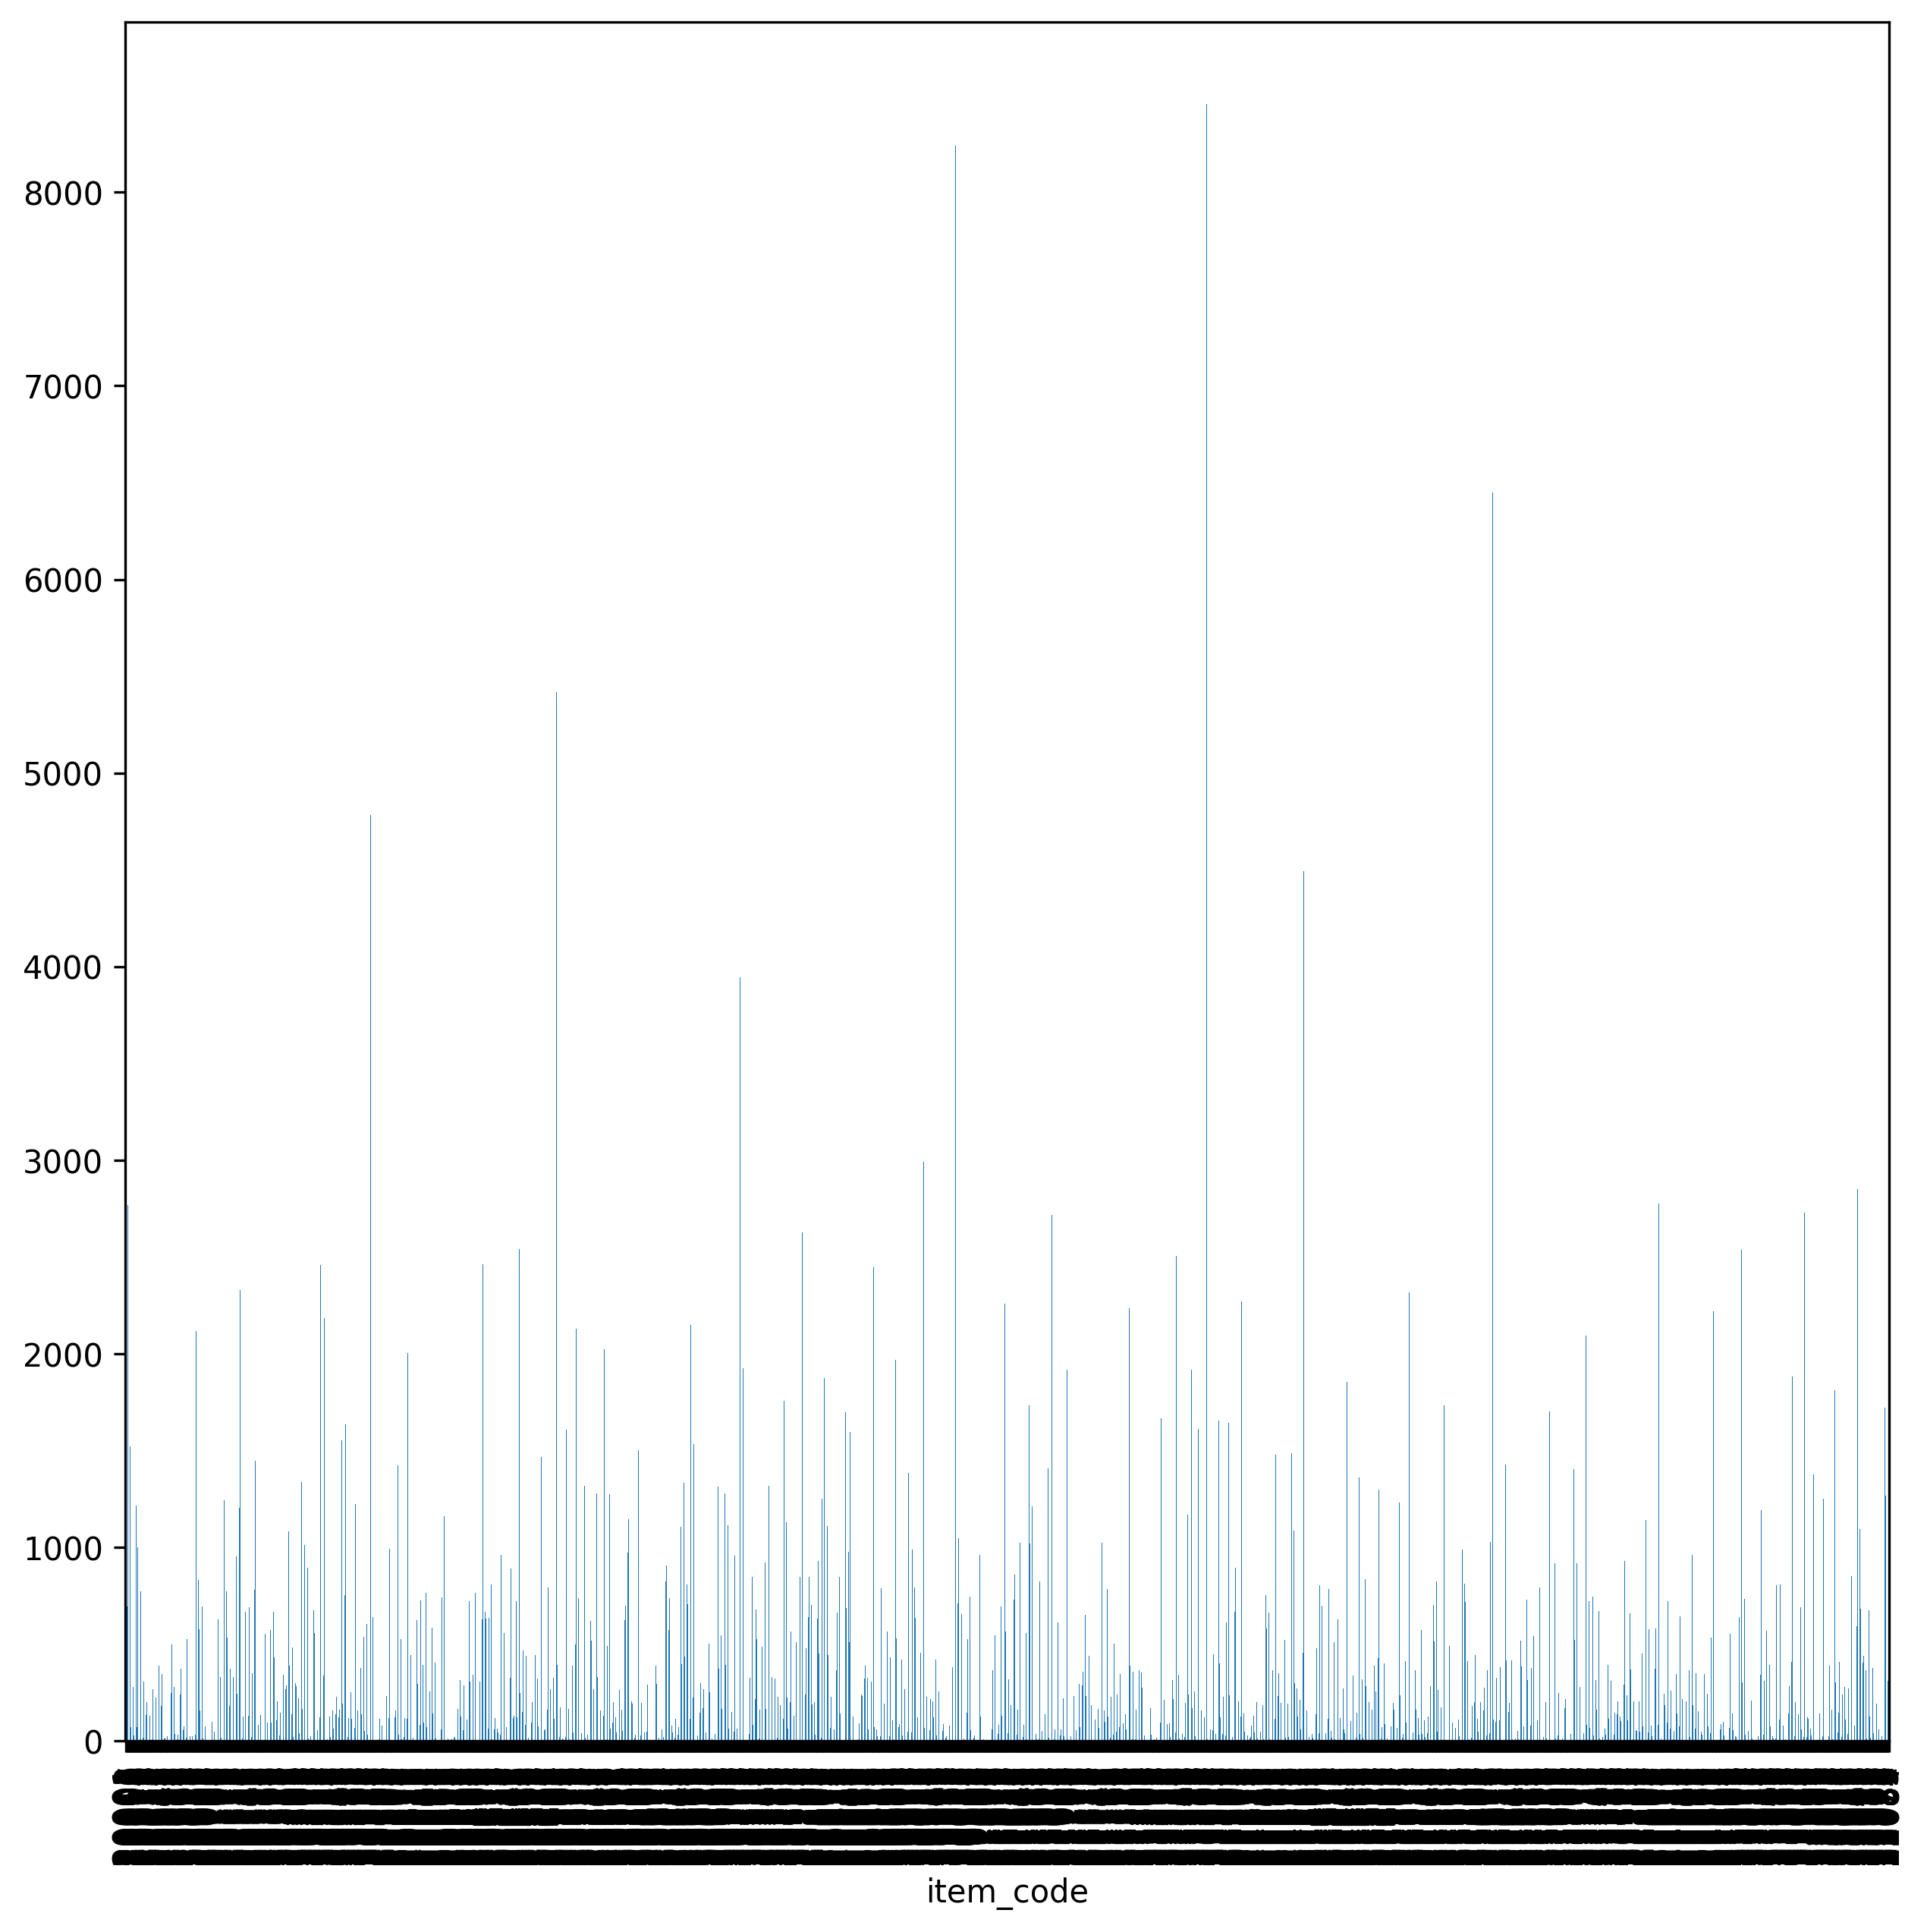

In [114]:
plt.figure(dpi=300,figsize=(10,10))
size.plot(kind="bar")


In [115]:
group21875=group.get_group(21875)

In [116]:
group21875

,order_date,sales_region_code,item_code,first_cate_code,second_cate_code,sales_chan_name,item_price,ord_qty
572191,2018/11/20,102,21875,302,408,offline,764.0,159
572432,2018/11/21,102,21875,302,408,offline,770.0,104
576274,2018/11/24,102,21875,302,408,offline,773.0,52
577149,2018/11/26,102,21875,302,408,offline,766.0,72
579593,2018/11/28,103,21875,302,408,offline,767.0,409
580899,2018/11/30,102,21875,302,408,offline,775.0,38
583817,2018/12/3,102,21875,302,408,offline,774.0,156
587867,2018/12/9,103,21875,302,408,offline,776.0,304
594016,2018/12/16,103,21875,302,408,offline,765.0,497
594510,2018/12/17,103,21875,302,408,offline,764.0,147


<AxesSubplot:>

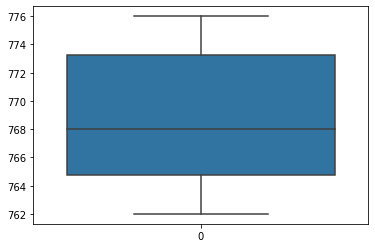

In [117]:
sns.boxplot(data=group21875["item_price"].values)

In [118]:
group21875["item_price"]

572191    764.0
572432    770.0
576274    773.0
577149    766.0
579593    767.0
580899    775.0
583817    774.0
587867    776.0
594016    765.0
594510    764.0
595741    769.0
597690    762.0
Name: item_price, dtype: float64

In [119]:
group20003=group.get_group(20003)

In [120]:
group20003

,order_date,sales_region_code,item_code,first_cate_code,second_cate_code,sales_chan_name,item_price,ord_qty
202,2015/9/5,104,20003,301,405,online,740.0,83
696,2015/9/7,104,20003,301,405,online,747.0,107
881,2015/9/8,104,20003,301,405,online,744.0,164
898,2015/9/8,104,20003,301,405,online,733.0,28
1322,2015/9/9,104,20003,301,405,online,744.0,165
...,...,...,...,...,...,...,...,...
595181,2018/12/18,101,20003,301,405,online,953.0,85
595483,2018/12/18,105,20003,301,405,online,1053.0,129
596467,2018/12/19,105,20003,301,405,offline,956.0,23
597147,2018/12/20,105,20003,301,405,online,1046.0,142


<AxesSubplot:>

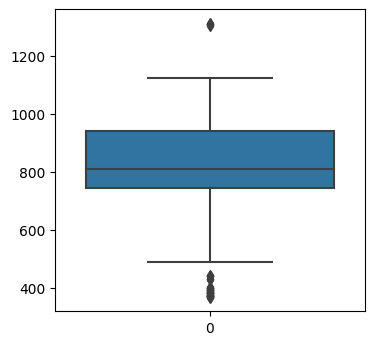

In [121]:
plt.figure(dpi=100,figsize=(4,4))
sns.boxplot(data=group20003["item_price"].values)

In [122]:
ymean=np.mean(group20003["item_price"].values)

In [123]:
ystd=np.std(group20003["item_price"].values)

In [124]:
threshold1=ymean-3*ystd
threshold2=ymean+3*ystd

In [125]:
dropIndex=[]
for i in range(len(group20003["item_price"].values)):
    if(group20003["item_price"].values[i]<threshold1 or group20003["item_price"].values[i]>threshold2):
        dropIndex.append(i)

In [126]:
group20003.index=range(len(group20003))

In [127]:
dropIndex
for i in dropIndex:
    group20003=group20003.drop(index=i)

In [128]:
group20003

,order_date,sales_region_code,item_code,first_cate_code,second_cate_code,sales_chan_name,item_price,ord_qty
0,2015/9/5,104,20003,301,405,online,740.0,83
1,2015/9/7,104,20003,301,405,online,747.0,107
2,2015/9/8,104,20003,301,405,online,744.0,164
3,2015/9/8,104,20003,301,405,online,733.0,28
4,2015/9/9,104,20003,301,405,online,744.0,165
...,...,...,...,...,...,...,...,...
2762,2018/12/18,101,20003,301,405,online,953.0,85
2763,2018/12/18,105,20003,301,405,online,1053.0,129
2764,2018/12/19,105,20003,301,405,offline,956.0,23
2765,2018/12/20,105,20003,301,405,online,1046.0,142


<AxesSubplot:>

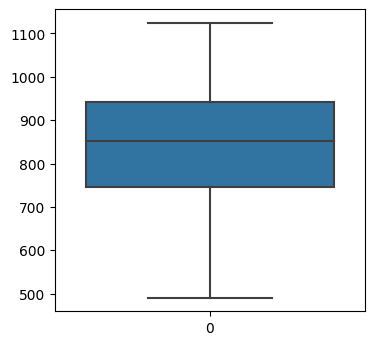

In [129]:
plt.figure(dpi=100,figsize=(4,4))
sns.boxplot(data=group20003["item_price"].values)

In [135]:
item_code=data_train["item_code"].unique()

In [136]:
item_code

array([22069, 20028, 21183, ..., 21110, 20551, 21320])

In [137]:
groups=[]
for i in item_code:
    group1=group.get_group(i)
    ymean=np.mean(group1["item_price"].values)
    ystd=np.std(group1["item_price"].values)
    threshold1=ymean-3*ystd
    threshold2=ymean+3*ystd
    dropIndex=[]
    for i in range(len(group1["item_price"].values)):
        if(group1["item_price"].values[i]<threshold1 or group1["item_price"].values[i]>threshold2):
            dropIndex.append(i)
    group1.index=range(len(group1))
    for i in dropIndex:
        group1=group1.drop(index=i)
    groups.append(group1)


    

In [139]:
len(groups)


1758

In [140]:
data_new=pd.concat(groups)

In [141]:
data_new

,order_date,sales_region_code,item_code,first_cate_code,second_cate_code,sales_chan_name,item_price,ord_qty
0,2015/9/1,104,22069,307,403,offline,1114.0,19
1,2015/9/19,104,22069,307,403,offline,1106.0,7
2,2015/9/20,104,22069,307,403,offline,1103.0,2
3,2015/10/31,104,22069,307,403,offline,1110.0,9
4,2015/11/7,104,22069,307,403,online,1403.0,10
...,...,...,...,...,...,...,...,...
0,2018/12/19,101,21110,307,403,offline,1199.0,10
1,2018/12/20,102,21110,307,403,offline,1181.0,5
2,2018/12/20,102,21110,307,403,offline,1188.0,11
0,2018/12/19,103,20551,306,407,offline,1018.0,108


In [143]:
data_new.index=range(len(data_new))

In [144]:
data_new

,order_date,sales_region_code,item_code,first_cate_code,second_cate_code,sales_chan_name,item_price,ord_qty
0,2015/9/1,104,22069,307,403,offline,1114.0,19
1,2015/9/19,104,22069,307,403,offline,1106.0,7
2,2015/9/20,104,22069,307,403,offline,1103.0,2
3,2015/10/31,104,22069,307,403,offline,1110.0,9
4,2015/11/7,104,22069,307,403,online,1403.0,10
...,...,...,...,...,...,...,...,...
585441,2018/12/19,101,21110,307,403,offline,1199.0,10
585442,2018/12/20,102,21110,307,403,offline,1181.0,5
585443,2018/12/20,102,21110,307,403,offline,1188.0,11
585444,2018/12/19,103,20551,306,407,offline,1018.0,108


In [145]:
group_new=data_new.groupby("item_code")

In [147]:
group_new.describe()

sales_region_code                                                    \
                      count        mean       std    min    25%    50%    75%   
item_code                                                                       
20001                  13.0  101.846154  0.987096  101.0  101.0  101.0  103.0   
20002                 694.0  103.886167  1.391588  101.0  103.0  105.0  105.0   
20003                2712.0  104.281342  1.009058  101.0  104.0  105.0  105.0   
20005                  19.0  103.473684  1.645479  101.0  102.5  103.0  105.0   
20006                1522.0  104.290407  1.036367  101.0  104.0  105.0  105.0   
...                     ...         ...       ...    ...    ...    ...    ...   
22080                1715.0  104.224490  1.500792  101.0  105.0  105.0  105.0   
22081                1225.0  102.009796  0.986793  101.0  101.0  102.0  103.0   
22082                 153.0  102.209150  0.783494  101.0  102.0  102.0  103.0   
22083                 310.0  104.180645  0.985139  103.0  103.0  105.0  105.0   
22084                 468.0  102.194444  0.718828  101.0  102.0  102.0  102.0   

                 first_cate_code         ... item_price         ord_qty  \
             max           count   mean  ...        75%     max   count   
item_code                                ...                              
20001      103.0            13.0  302.0  ...     705.00   709.0    13.0   
20002      105.0           694.0  303.0  ...    2161.75  2507.0   694.0   
20003      105.0          2712.0  301.0  ...     941.00  1124.0  2712.0   
20005      105.0            19.0  306.0  ...     751.50   754.0    19.0   
20006      105.0          1522.0  307.0  ...     793.00   863.0  1522.0   
...          ...             ...    ...  ...        ...     ...     ...   
22080      105.0          1715.0  306.0  ...     815.00   896.2  1715.0   
22081      105.0          1225.0  303.0  ...    2605.00  5659.0  1225.0   
22082      105.0           153.0  305.0  ...    2014.00  2115.0   153.0   
22083      105.0           310.0  303.0  ...    1704.50  2104.0   310.0   
22084      105.0           468.0  302.0  ...    1048.00  3017.0   468.0   

                                                                     
                 mean         std  min   25%    50%     75%     max  
item_code                                                            
20001      180.000000  164.369502  6.0  36.0  185.0  305.00   562.0  
20002       12.956772   24.797497  1.0   6.0    9.0   13.00   382.0  
20003      114.038717  172.838367  1.0  14.0   54.0  143.00  2553.0  
20005       10.000000    6.774134  3.0   6.0    9.0    9.00    26.0  
20006       63.145204   96.545128  1.0  11.0   29.5   72.75  1169.0  
...               ...         ...  ...   ...    ...     ...     ...  
22080      263.078134  411.772104  1.0  13.0   96.0  346.50  4744.0  
22081       20.677551   24.887158  1.0   8.0   13.0   24.00   206.0  
22082       15.941176   13.694138  2.0   8.0   12.0   17.00   105.0  
22083      171.735484  335.018544  2.0   8.0   13.0  201.75  2202.0  
22084       24.775641   46.678394  1.0   5.0    9.0   22.25   507.0  

[1758 rows x 40 columns]

In [148]:
data_new.to_csv("/Users/steafen/Desktop/order_train_new.csv")

In [149]:
group20003

,order_date,sales_region_code,item_code,first_cate_code,second_cate_code,sales_chan_name,item_price,ord_qty
0,2015/9/5,104,20003,301,405,online,740.0,83
1,2015/9/7,104,20003,301,405,online,747.0,107
2,2015/9/8,104,20003,301,405,online,744.0,164
3,2015/9/8,104,20003,301,405,online,733.0,28
4,2015/9/9,104,20003,301,405,online,744.0,165
...,...,...,...,...,...,...,...,...
2762,2018/12/18,101,20003,301,405,online,953.0,85
2763,2018/12/18,105,20003,301,405,online,1053.0,129
2764,2018/12/19,105,20003,301,405,offline,956.0,23
2765,2018/12/20,105,20003,301,405,online,1046.0,142


In [162]:
x=group21875["order_date"]

In [163]:
x

572191    2018/11/20
572432    2018/11/21
576274    2018/11/24
577149    2018/11/26
579593    2018/11/28
580899    2018/11/30
583817     2018/12/3
587867     2018/12/9
594016    2018/12/16
594510    2018/12/17
595741    2018/12/18
597690    2018/12/20
Name: order_date, dtype: object

In [164]:
y=group21875["ord_qty"]

In [165]:
y

572191    159
572432    104
576274     52
577149     72
579593    409
580899     38
583817    156
587867    304
594016    497
594510    147
595741    868
597690    502
Name: ord_qty, dtype: int64

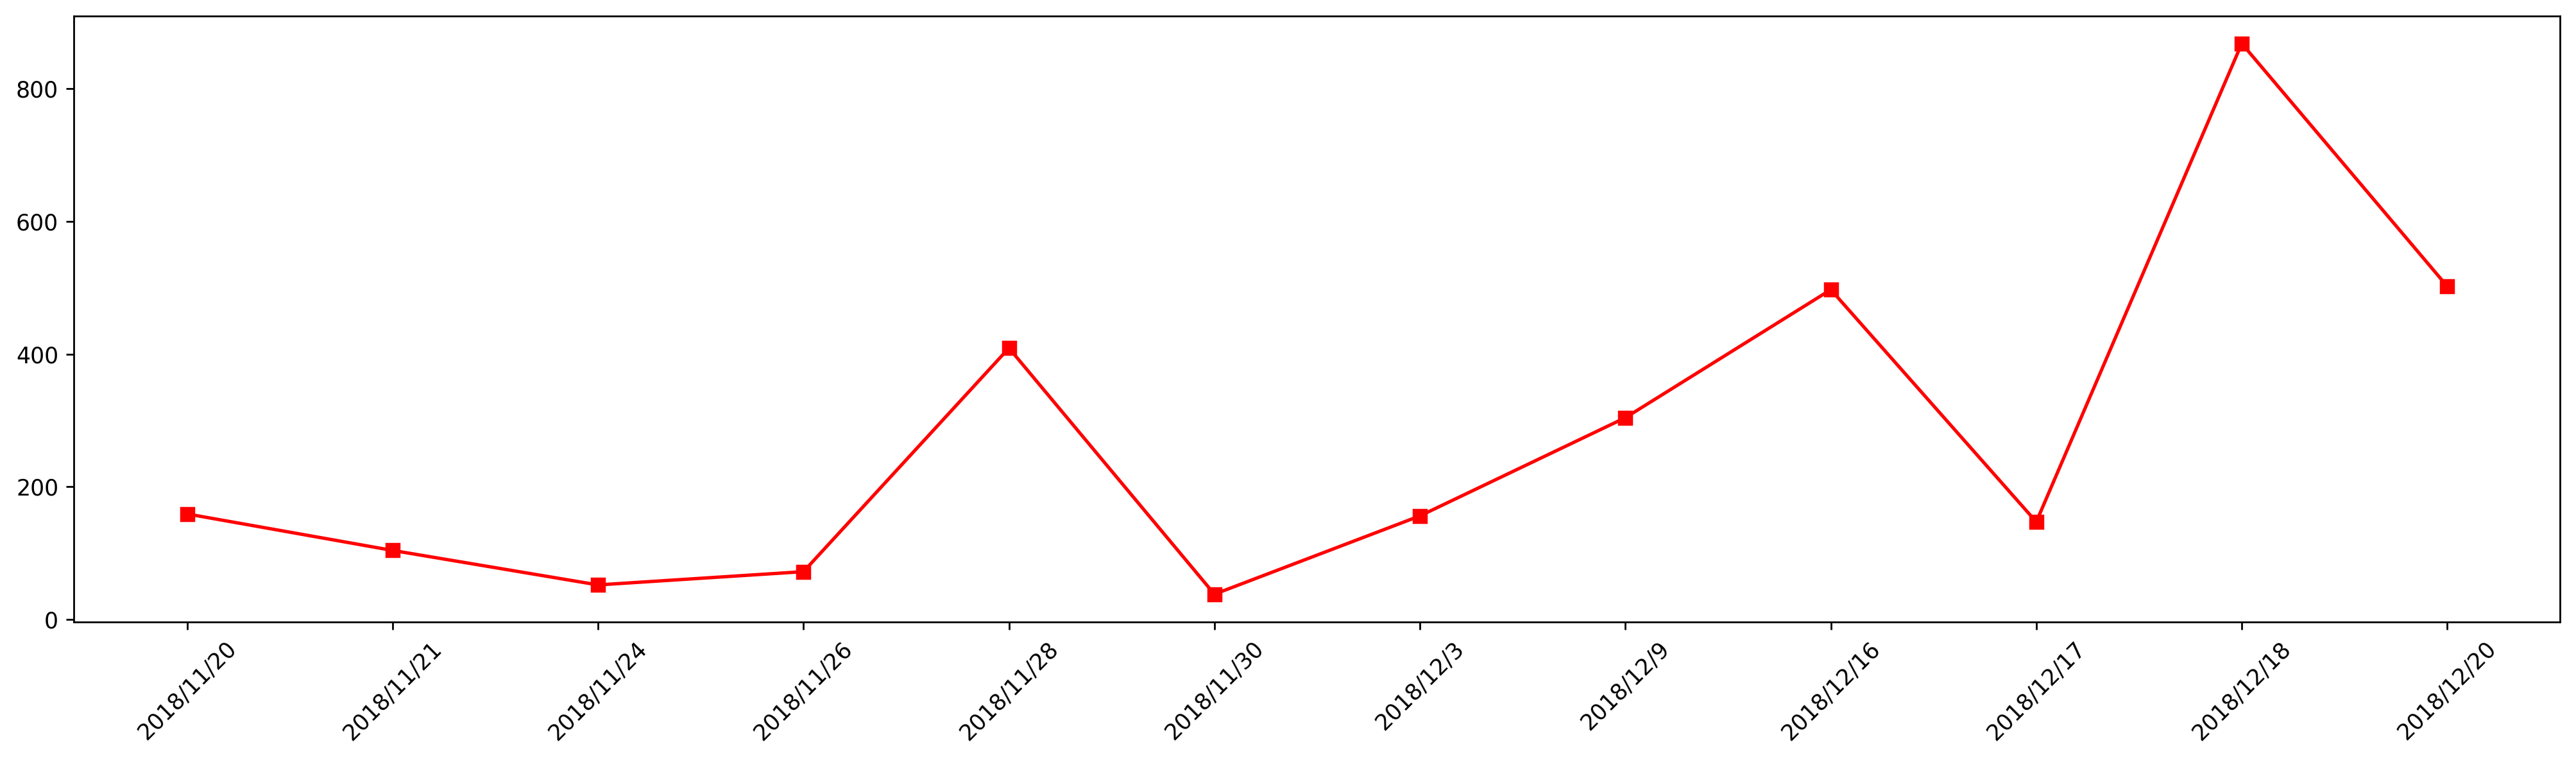

In [174]:
plt.figure(dpi=250,figsize=(20,5))
plt.xticks(rotation=45)
plt.plot(x,y,'s-',color = 'r')

In [158]:
group21875

,order_date,sales_region_code,item_code,first_cate_code,second_cate_code,sales_chan_name,item_price,ord_qty
572191,2018/11/20,102,21875,302,408,offline,764.0,159
572432,2018/11/21,102,21875,302,408,offline,770.0,104
576274,2018/11/24,102,21875,302,408,offline,773.0,52
577149,2018/11/26,102,21875,302,408,offline,766.0,72
579593,2018/11/28,103,21875,302,408,offline,767.0,409
580899,2018/11/30,102,21875,302,408,offline,775.0,38
583817,2018/12/3,102,21875,302,408,offline,774.0,156
587867,2018/12/9,103,21875,302,408,offline,776.0,304
594016,2018/12/16,103,21875,302,408,offline,765.0,497
594510,2018/12/17,103,21875,302,408,offline,764.0,147


In [194]:
group.get_group(21169)

,order_date,sales_region_code,item_code,first_cate_code,second_cate_code,sales_chan_name,item_price,ord_qty
202798,2017/2/28,105,21169,305,412,online,800.0,250
204410,2017/3/3,105,21169,305,412,online,798.0,34
205366,2017/3/5,105,21169,305,412,online,809.0,48
205732,2017/3/6,105,21169,305,412,online,798.0,20
207379,2017/3/9,105,21169,305,412,online,808.0,146
208043,2017/3/10,105,21169,305,412,online,802.0,10
208044,2017/3/10,105,21169,305,412,online,794.0,36
208153,2017/3/10,105,21169,305,412,offline,697.0,12
208759,2017/3/11,105,21169,305,412,online,804.0,31
209343,2017/3/12,105,21169,305,412,online,809.0,31


In [195]:
group21169=group.get_group(21169)

In [196]:
x=group21169["order_date"]
y=group21169["ord_qty"]

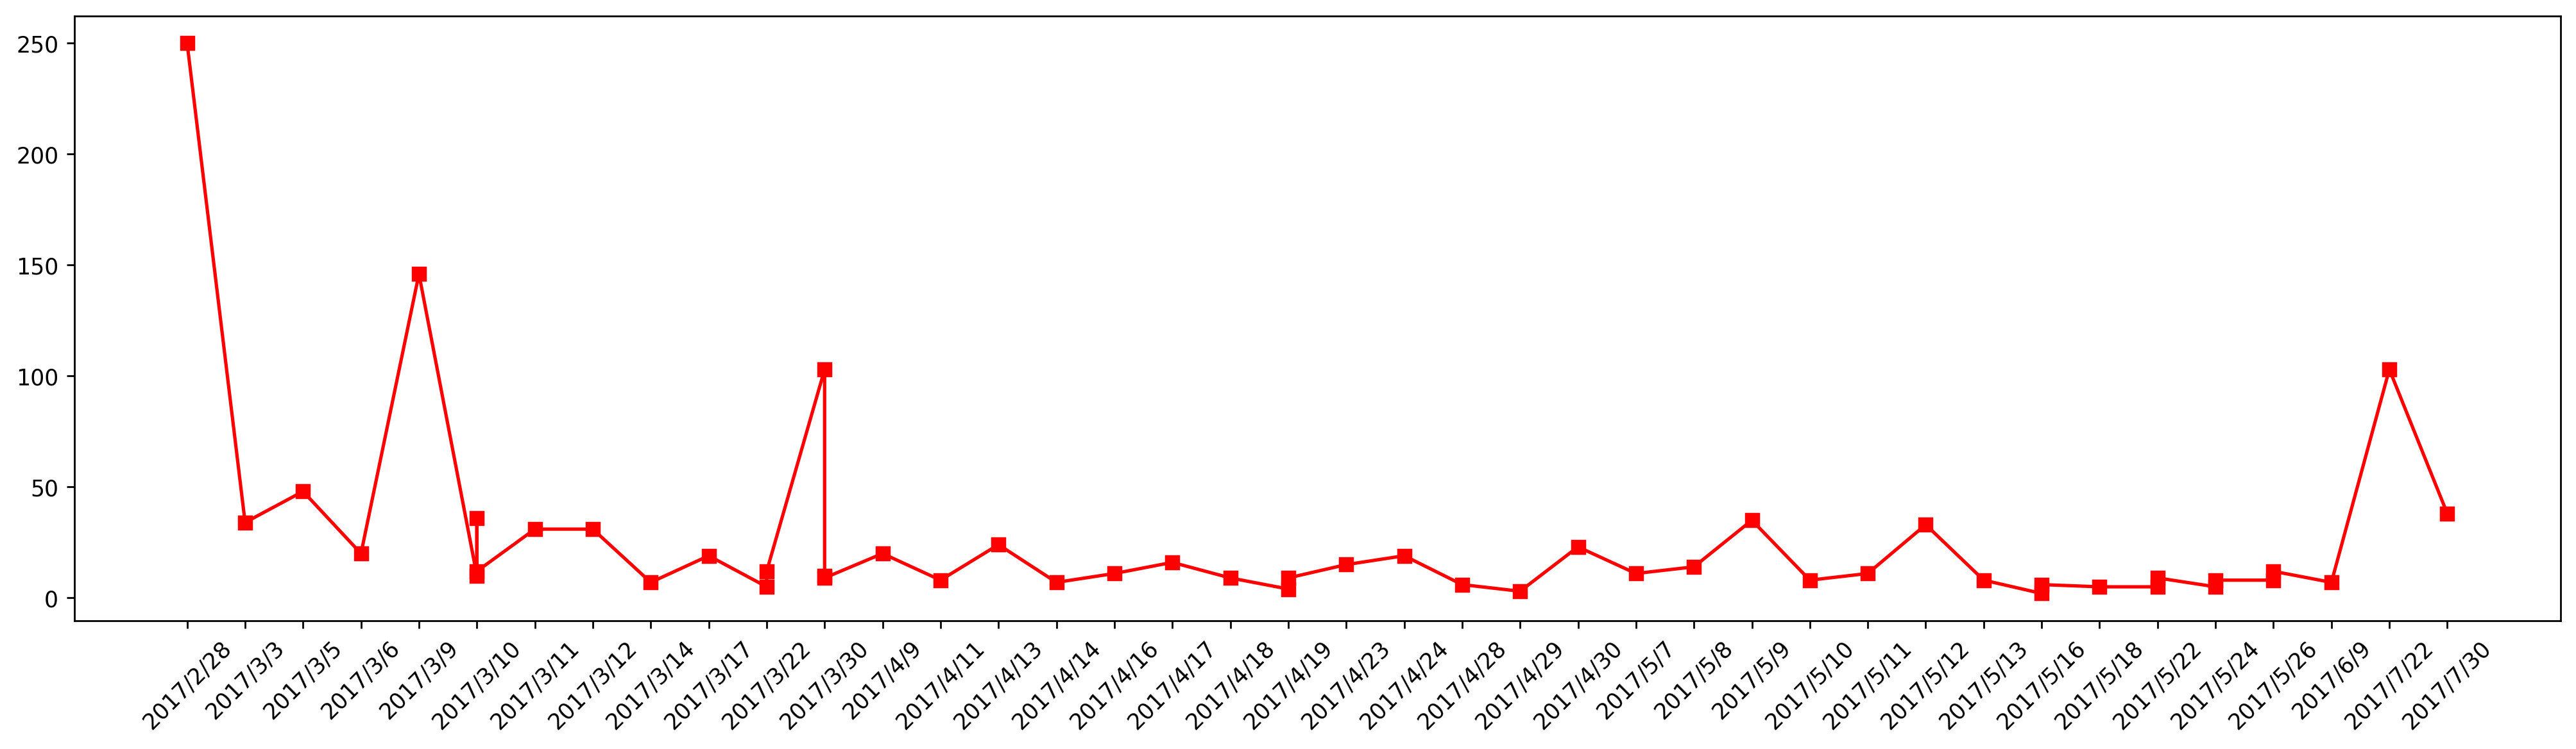

In [199]:
plt.figure(dpi=250,figsize=(20,5))
plt.xticks(rotation=45)
plt.plot(x,y,'s-',color = 'r')

In [202]:
group21169_new=group21169[["order_date","ord_qty"]]

In [218]:
temp=group21169_new.groupby("order_date").sum()

In [221]:
temp['ord_qty'].values

array([250,  58,  31,  31,   7,  19,  17,  34, 122,  48,  20, 146,   8,
        24,   7,  11,  16,   9,  13,  15,  19,   6,   3,  23,  20,   8,
        11,  33,   8,   8,   5,  14,  13,  20,  11,  14,  35,   7, 103,
        38])

In [222]:
group21169_new = pd.DataFrame(columns=['order_date', 'ord_qty'])
group21169_new

,order_date,ord_qty


In [233]:
group21169_new

,order_date,ord_qty
0,2017/2/28,250
1,2017/3/10,58
2,2017/3/11,31
3,2017/3/12,31
4,2017/3/14,7
5,2017/3/17,19
6,2017/3/22,17
7,2017/3/3,34
8,2017/3/30,122
9,2017/3/5,48


In [232]:
group21169_new['ord_qty'] = temp['ord_qty'].values
group21169_new['order_date'] = temp['ord_qty'].index
natsorted(group21169_new["order_date"])

['2017/2/28',
 '2017/3/3',
 '2017/3/5',
 '2017/3/6',
 '2017/3/9',
 '2017/3/10',
 '2017/3/11',
 '2017/3/12',
 '2017/3/14',
 '2017/3/17',
 '2017/3/22',
 '2017/3/30',
 '2017/4/9',
 '2017/4/11',
 '2017/4/13',
 '2017/4/14',
 '2017/4/16',
 '2017/4/17',
 '2017/4/18',
 '2017/4/19',
 '2017/4/23',
 '2017/4/24',
 '2017/4/28',
 '2017/4/29',
 '2017/4/30',
 '2017/5/7',
 '2017/5/8',
 '2017/5/9',
 '2017/5/10',
 '2017/5/11',
 '2017/5/12',
 '2017/5/13',
 '2017/5/16',
 '2017/5/18',
 '2017/5/22',
 '2017/5/24',
 '2017/5/26',
 '2017/6/9',
 '2017/7/22',
 '2017/7/30']

In [ ]:
group21169_new_sorted=group21169_new.iloc[natsorted(group21169_new["order_date"])].res

In [216]:
group21169_new_mix["ord_qty"].index

Index(['2017/2/28', '2017/3/10', '2017/3/11', '2017/3/12', '2017/3/14',
       '2017/3/17', '2017/3/22', '2017/3/3', '2017/3/30', '2017/3/5',
       '2017/3/6', '2017/3/9', '2017/4/11', '2017/4/13', '2017/4/14',
       '2017/4/16', '2017/4/17', '2017/4/18', '2017/4/19', '2017/4/23',
       '2017/4/24', '2017/4/28', '2017/4/29', '2017/4/30', '2017/4/9',
       '2017/5/10', '2017/5/11', '2017/5/12', '2017/5/13', '2017/5/16',
       '2017/5/18', '2017/5/22', '2017/5/24', '2017/5/26', '2017/5/7',
       '2017/5/8', '2017/5/9', '2017/6/9', '2017/7/22', '2017/7/30'],
      dtype='object', name='order_date')

In [225]:
x=group21169_new["order_date"]
y=group21169_new["ord_qty"]

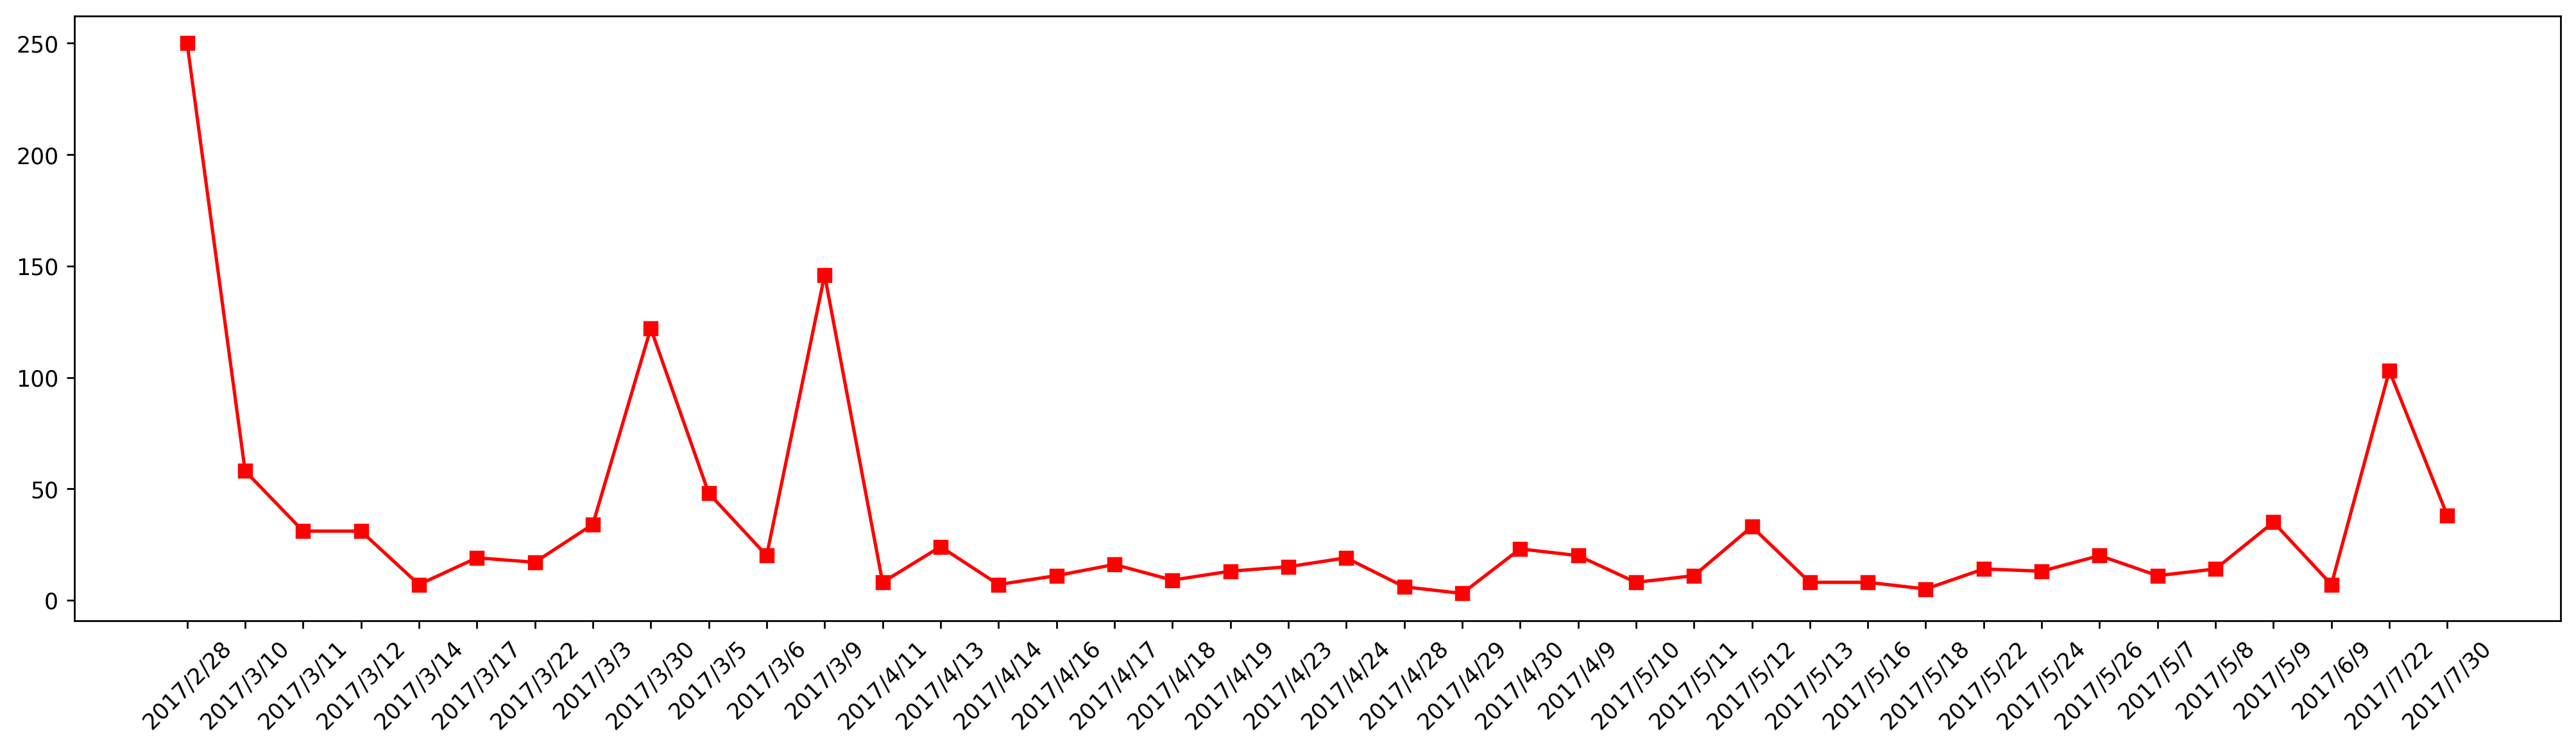

In [226]:
plt.figure(dpi=250,figsize=(20,5))
plt.xticks(rotation=45)
plt.plot(x,y,'s-',color = 'r')

In [227]:
def drawLineChart(i):
    group_draw=group.get_group(i)
    group_draw_new=group_draw[["order_date","ord_qty"]]
    temp=group_draw_new.groupby("order_date").sum()
    group_draw_new1 = pd.DataFrame(columns=['order_date', 'ord_qty'])
    group_draw_new1['ord_qty'] = temp['ord_qty'].values
    group_draw_new1['order_date'] = temp['ord_qty'].index
    x=group_draw_new1["order_date"]
    y=group_draw_new1["ord_qty"]
    plt.figure(dpi=250,figsize=(20,5))
    plt.xticks(rotation=45)
    plt.plot(x,y,'s-',color = 'r')

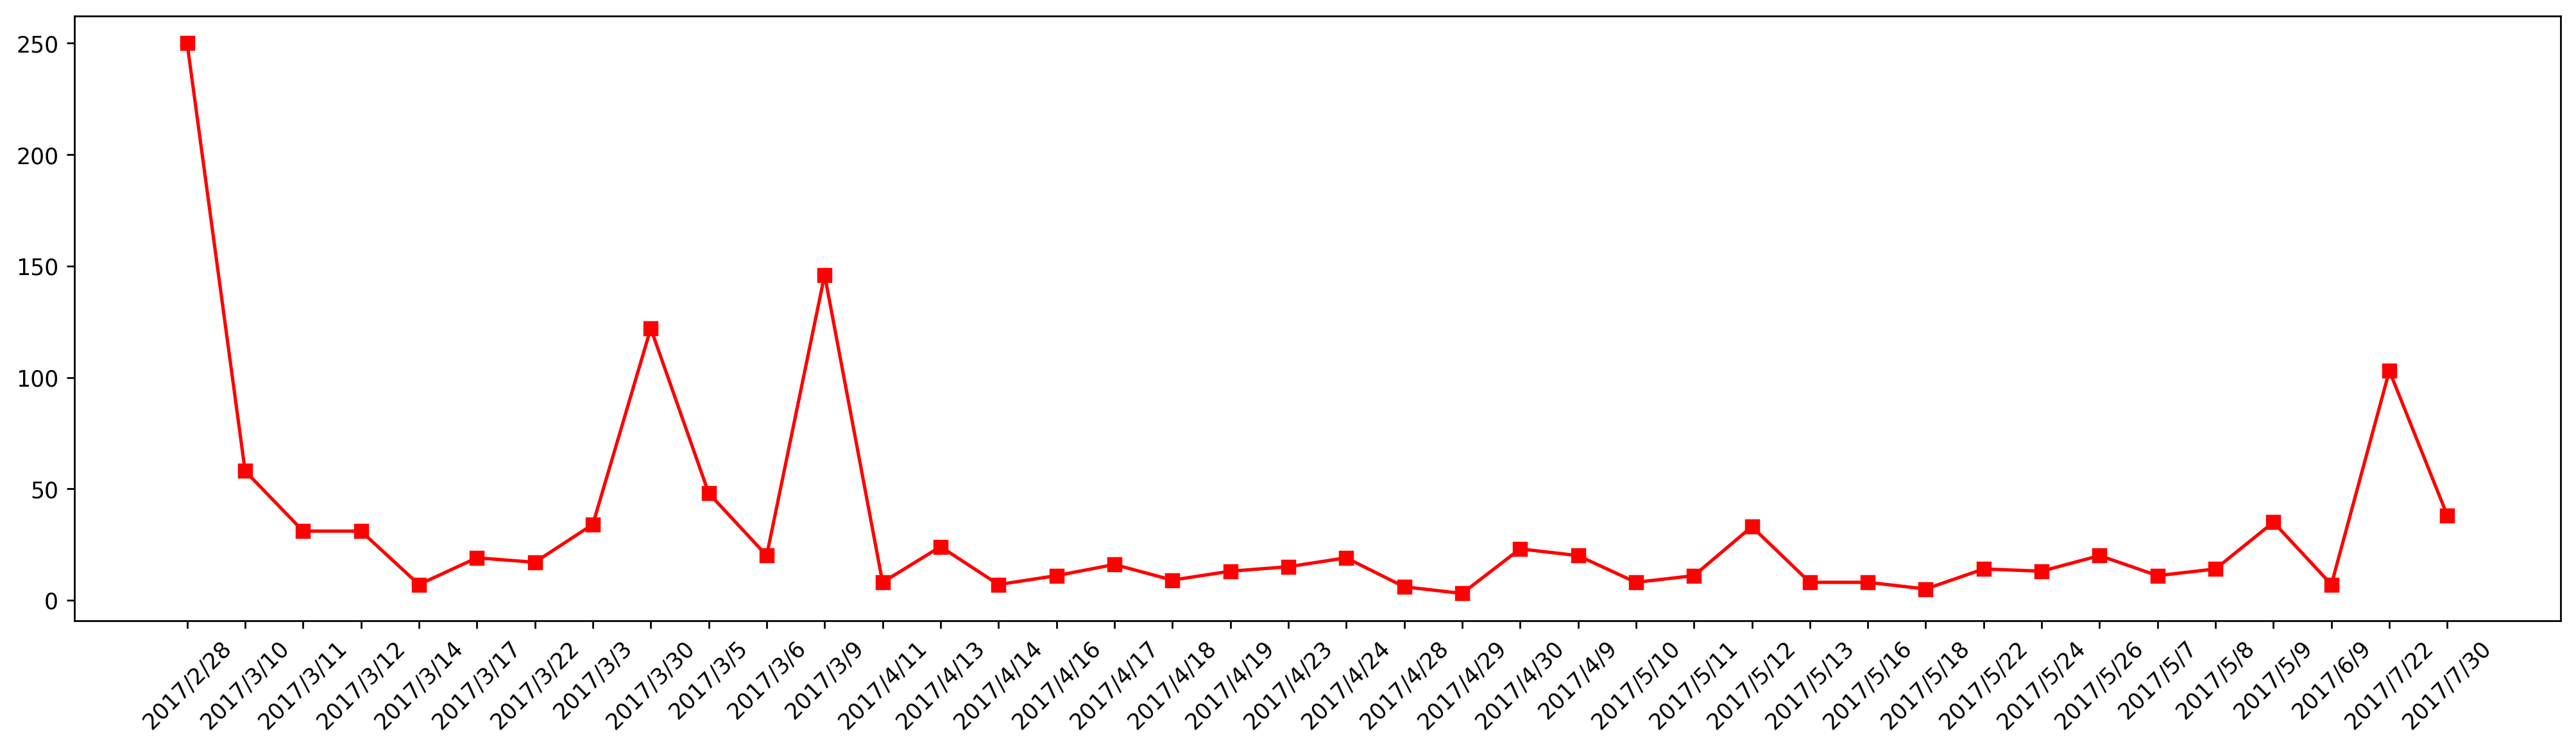

In [228]:
drawLineChart(21169)

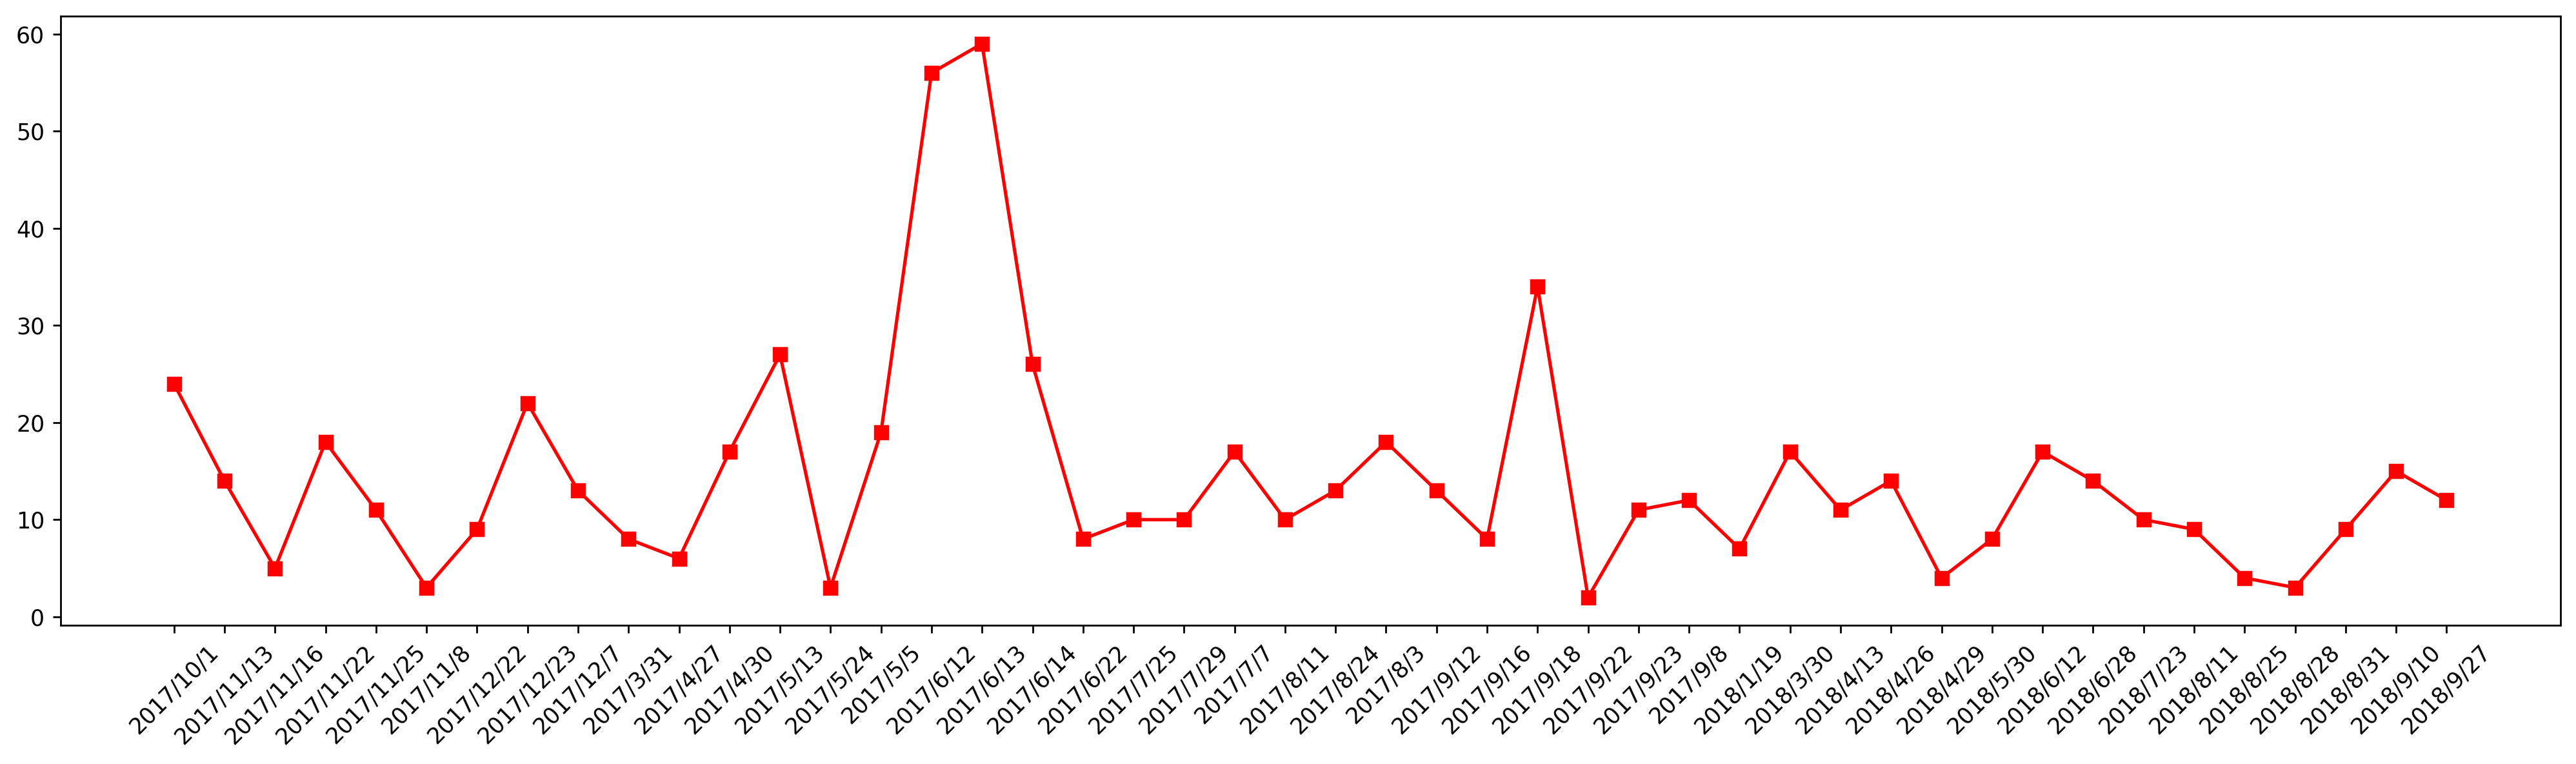

In [229]:
drawLineChart(21317)

In [230]:
!pip install natsort


[notice] A new release of pip available: 22.3.1 -> 23.1
[notice] To update, run: pip install --upgrade pip


In [231]:
from natsort import natsorted

In [ ]:
natsorted()